# Query for Spectraction Results in OGA

 work with Weakly_2023_19
- use jupyter kernel LSST
- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab
- creation date : 2023/05/17
- last update : 2023/05/17

- Spectractor https://github.com/lsst/Spectractor/
- Spectractor Version 2.4



In [1]:
! eups list -s | grep LOCAL

atmospec              LOCAL:/home/d/dagoret/repos/repos_w_2023_27/atmospec 	setup
eups                  LOCAL:/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-6.0.0/eups 	setup


In [2]:
! eups list -s lsst_distrib

   gdf42428520+4e9f6d16c8 	current w_2023_27 setup


In [3]:
import h5py

In [4]:
import lsst.daf.butler as dafButler
#import lsst.summit.utils.butlerUtils as butlerUtils

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm
import pandas as pd

import matplotlib.ticker                         # here's where the formatter is
import os
import re
import pandas as pd

plt.rcParams["figure.figsize"] = (4,3)
plt.rcParams["axes.labelsize"] = 'xx-large'
plt.rcParams['axes.titlesize'] = 'xx-large'
plt.rcParams['xtick.labelsize']= 'xx-large'
plt.rcParams['ytick.labelsize']= 'xx-large'

In [6]:
import pickle

In [7]:
from astropy.time import Time
import astropy.units as u

## Config

In [8]:
FLAG_MOUNT_ERRORS= False

### Butler

In [9]:
#repo =  "/sdf/group/rubin/repo/main"
#repo = "/sdf/group/rubin/repo/oga/"
repo = "/repo/embargo/"
butler = dafButler.Butler(repo)
registry = butler.registry

### Date & Filter & Disperser & collection

- make your choice

In [10]:
DateToRuncollection = {
    
 # september 2022
 20220912 :  "u/dagoret/BPS_manyspectro_v60", # Missing collection
 20220913 :  "u/dagoret/BPS_manyspectro_v61", # Missing collection
 20220914 :  "u/dagoret/BPS_manyspectro_v62", # Missing collection  
    
 20220927 :  "u/dagoret/BPS_manyspectro_v63", # Mount errors available, mitigé
 20220928 :  "u/dagoret/BPS_manyspectro_v64", # Mount errors available, very nice spectra
 20220929 :  "u/dagoret/BPS_manyspectro_v65", # Mount errors available, very nice spectra
    
    
 # october 2022
 20221012 :  "u/dagoret/BPS_manyspectro_v56", # mount errors , nice, all good
 20221025 :  "u/dagoret/BPS_manyspectro_v57", # mount errors, very very bad spectra, run not selected
 20221026 :  "u/dagoret/BPS_manyspectro_v58", # mount errors,  very nice spectra, all good
 20221027 :  "u/dagoret/BPS_manyspectro_v59", # mount errors,  nice spectra, all good
    
 # november 2022
 20221109 :  "u/dagoret/BPS_manyspectro_v53", # mount errors, nice spectra, few bad labelled as good 
 20221110 :  "u/dagoret/BPS_manyspectro_v54", # mount errors available, many bad rec spectra, few bad labelled as good, versy strange
 20221123 :  "u/dagoret/BPS_manyspectro_v55", # mount errors , nice   
    
 # december 2022   
 20221207 :  "u/dagoret/BPS_manyspectro_v48", # No mount error, nice spectra
 20221208 :  "u/dagoret/BPS_manyspectro_v49", # No mount error, nice spectra, one bad labelled as good
 20221209 :  "u/dagoret/BPS_manyspectro_v50", # No mount error, spectra at distance from optical center, very interesting
 20221210 :  "u/dagoret/BPS_manyspectro_v51", # No mount error, bof
 20221212 :  "u/dagoret/BPS_manyspectro_v52", # No mount error, very bad gains and instability 
    
 #January 2023 
 20230117 :  "u/dagoret/BPS_manyspectro_v79", # no mount errors, some mucol spectra that looks good are rejected on DCCD
 20230118 :  "u/dagoret/BPS_manyspectro_v80", # no mount error, some mucol looking good are rejected, many bad centroid calculation
 20230119 :  "u/dagoret/BPS_manyspectro_v77", # no mount errors, many blurred spectra probably due to strong tracking error
 20230131 :  "u/dagoret/BPS_manyspectro_v78", # missing for moment

 #february 2023
 20230214 :  "u/dagoret/BPS_manyspectro_v42", # no mount errors, nothing special
 20230215 :  "u/dagoret/BPS_manyspectro_v43", # mount errors, OK
 20230216 :  "u/dagoret/BPS_manyspectro_v44", # mount errors, OK, nice spectra 
 20230228 :  "u/dagoret/BPS_manyspectro_v70", # No mount error,OK nice spectra
    
 #march 2023  
 20230301 :  "u/dagoret/BPS_manyspectro_v71", # no mount errors, OK many spectra
 20230302 :  "u/dagoret/BPS_manyspectro_v72", # no mount error, sometime bad subtraction of order2 on HD38666 (mucol) 
 20230315 :  "u/dagoret/BPS_manyspectro_v73", # mount errors
 20230316 :  "u/dagoret/BPS_manyspectro_v74", # mount errors   
    
# may 2023
    
 20230509 :  "u/dagoret/BPS_manyspectro_v81", 
 20230510 :  "u/dagoret/BPS_manyspectro_v82",   
 20230511 :  "u/dagoret/BPS_manyspectro_v83",
    
}

In [11]:
DATE = 20230511
my_collection = DateToRuncollection[DATE]

filterdispersername = "empty~holo4_003"

RUNSELECTION = 20230330
#RUNSELECTION = 20230403

# List of Dataset types avalaible in my collection

## List of dataset types

In [12]:
list(registry.queryDatasetTypes("*spec*"))

[DatasetType('atmospecCentroid', {band, instrument, detector, physical_filter, visit}, StructuredDataDict),
 DatasetType('spectraction', {band, instrument, detector, physical_filter, visit}, Spectraction),
 DatasetType('spectractorImage', {band, instrument, detector, physical_filter, visit}, SpectractorImage),
 DatasetType('spectractorSpectrum', {band, instrument, detector, physical_filter, visit}, SpectractorSpectrum),
 DatasetType('spectrogramLibradtranFitParameters', {band, instrument, detector, physical_filter, visit}, SpectractorFitParameters),
 DatasetType('spectrumForwardModelFitParameters', {band, instrument, detector, physical_filter, visit}, SpectractorFitParameters),
 DatasetType('spectrumLibradtranFitParameters', {band, instrument, detector, physical_filter, visit}, SpectractorFitParameters)]

## list of datasets

In [13]:
list(registry.queryDatasets("*spec*", collections=[my_collection]))[:10]

[DatasetRef(DatasetType('atmospecCentroid', {band, instrument, detector, physical_filter, visit}, StructuredDataDict), {instrument: 'LATISS', detector: 0, visit: 2023051100175, ...}, run='u/dagoret/BPS_manyspectro_v83/20230515T141352Z', id=76c643b0-2988-49f3-8e28-c41fa2c78523),
 DatasetRef(DatasetType('atmospecCentroid', {band, instrument, detector, physical_filter, visit}, StructuredDataDict), {instrument: 'LATISS', detector: 0, visit: 2023051100240, ...}, run='u/dagoret/BPS_manyspectro_v83/20230515T141352Z', id=fcb1f9f1-7116-494f-a309-ebbb237d9202),
 DatasetRef(DatasetType('atmospecCentroid', {band, instrument, detector, physical_filter, visit}, StructuredDataDict), {instrument: 'LATISS', detector: 0, visit: 2023051100233, ...}, run='u/dagoret/BPS_manyspectro_v83/20230515T141352Z', id=b262b0a8-2830-494a-9de2-ccfcb3e54696),
 DatasetRef(DatasetType('atmospecCentroid', {band, instrument, detector, physical_filter, visit}, StructuredDataDict), {instrument: 'LATISS', detector: 0, visit: 2

### Spectractor

In [14]:
configmode = "PSF2DFFM_REBIN2"
#configmode = "PSF2DFFM_REBIN1"
#ext="_b"
specver="specV2.4"

https://www.pythonforthelab.com/blog/how-to-use-hdf5-files-in-python/

In [15]:
#summary_file = f"summaryspectra_{DATE}-{filterdispersername}-{configmode}-oga.csv"
summary_file = f"summaryspectra_{DATE}-{filterdispersername}-{configmode}-{specver}-oga.csv"
output_file_h5 = f"allspectra_{DATE}-{filterdispersername}-{configmode}-{specver}-oga.hdf5"

### The collection

In [16]:
datasetRefs = registry.queryDatasets(datasetType='spectractorSpectrum', collections=my_collection, where= "instrument='LATISS'")

In [17]:
# following line not possible in OGA
#butler = butlerUtils.makeDefaultLatissButler(extraCollections=[my_collection])

In [18]:
if FLAG_MOUNT_ERRORS:
    df_mounterrors = pd.read_csv("mountErrors.csv")
    df=df_mounterrors[df_mounterrors["date_obs"] == DATE ]
    if len(df) == 0:
        FLAG_MOUNT_ERRORS = False
        

## Loop on exposures

In [19]:
#outfile.close()

In [20]:
all_dataId = []     # full data id
all_spec = []       # spectra
all_exposures = []  # exposure number
all_num = []        # sequence numbers
all_h5group = []

hf_outfile =  h5py.File(output_file_h5, 'w') 
  

for i, ref in enumerate(datasetRefs):

    print(f"============= ({i}) ============datasetType = spectraction ============================================")
    print("fullId..................:",ref.dataId.full)
    print("visit...................:",ref.dataId["visit"])
    print("band....................:",ref.dataId["band"])
    print("physical filter.........:",ref.dataId["physical_filter"])
    print("run.....................:",ref.run)
    
    #through old runs
    date_of_run = int(ref.run.split("/")[-1].split("T")[0])
    if date_of_run< RUNSELECTION :
        continue
 
    
    
    the_exposure = ref.dataId["visit"]
    the_day_obs = ref.dataId["visit"]//100_000
    the_seq_num = ref.dataId["visit"]- the_day_obs*100_000    
    the_dataId = {'day_obs': the_day_obs,'seq_num':the_seq_num,'detector':0}
    print(the_dataId)
    
    the_exposure_key = str(the_exposure)
    
    if the_exposure not in all_exposures:
        g = hf_outfile.create_group(the_exposure_key)
        all_h5group.append(g) 
    else:
        print(f">>>>>>  already existing key {the_exposure_key} Skip it !!! ")
        the_exposure_key = the_exposure_key + "_b"
        continue
   
    
    # retrieve the spectrum from Butler
    #spec       = butler.get('spectraction',the_dataId)
    spec = butler.get('spectractorSpectrum', visit=the_exposure, detector=0, collections=my_collection, instrument='LATISS')
    
    # save in collection lists
    all_dataId.append(the_dataId) 
    all_exposures.append(the_exposure)
    all_spec.append(spec)
    all_num.append(the_seq_num)
    

============= (0) ============datasetType = spectraction ============================================
fullId..................: {band: 'white', instrument: 'LATISS', detector: 0, physical_filter: 'empty~holo4_003', visit: 2023051100191}
visit...................: 2023051100191
band....................: white
physical filter.........: empty~holo4_003
run.....................: u/dagoret/BPS_manyspectro_v83/20230515T141352Z
{'day_obs': 20230511, 'seq_num': 191, 'detector': 0}
============= (1) ============datasetType = spectraction ============================================
fullId..................: {band: 'white', instrument: 'LATISS', detector: 0, physical_filter: 'empty~holo4_003', visit: 2023051100240}
visit...................: 2023051100240
band....................: white
physical filter.........: empty~holo4_003
run.....................: u/dagoret/BPS_manyspectro_v83/20230515T141352Z
{'day_obs': 20230511, 'seq_num': 240, 'detector': 0}
============= (2) ============datasetType = sp

In [21]:
hf_outfile.keys()

<KeysViewHDF5 ['2023051100138', '2023051100155', '2023051100160', '2023051100163', '2023051100167', '2023051100172', '2023051100175', '2023051100179', '2023051100184', '2023051100187', '2023051100191', '2023051100196', '2023051100199', '2023051100203', '2023051100208', '2023051100211', '2023051100215', '2023051100220', '2023051100223', '2023051100228', '2023051100233', '2023051100236', '2023051100240', '2023051100245', '2023051100248', '2023051100252', '2023051100257', '2023051100260']>

In [22]:
index = 0

spec = all_spec[index]

In [23]:
the_h5group = all_h5group[index] 

In [24]:
d = the_h5group.create_dataset('airmass', data=spec.airmass)

In [25]:
spec.airmass

2.17545572410385

In [26]:
spec.date_obs

'2023-05-12T00:12:29.645996707Z'

In [27]:
spec.cov_matrix.shape

(1137, 1137)

In [28]:
spec.lambdas.shape

(1137,)

In [29]:
spec.data_next_order.shape

(1137,)

In [30]:
#spec.chromatic_psf.load_table()
spec.chromatic_psf.table

<Table length=1137>
     lambdas               Dx         ...       alpha            saturation    
     float64            float64       ...      float64            float64      
------------------ ------------------ ... ------------------ ------------------
 295.3907338590188  415.8454855389784 ...  4.387468538851465 22666.666666666686
 296.1106468104192  416.8454855389784 ...  4.386379269160229 22666.666666666686
 296.8304717844195  417.8454855389784 ...  4.385286811862598 22666.666666666686
 297.5502097119715  418.8454855389784 ...  4.384191166958572 22666.666666666686
298.26986150871676  419.8454855389784 ...   4.38309233444815 22666.666666666686
 298.9894280749574  420.8454855389784 ...  4.381990314331332 22666.666666666686
 299.7089102960456  421.8454855389784 ...  4.380885106608119 22666.666666666686
 300.4283090427144  422.8454855389784 ... 4.3797767112785095 22666.666666666686
 301.1476251717066  423.8454855389784 ...  4.378665128342505 22666.666666666686
 301.8668595255365  424.8454855389784 ...  4.377550357800105 22666.666666666686
               ...                ... ...                ...                ...
1086.2313645795043 1542.8454855389784 ... 1.1373221512203529 22666.666666666686
1086.9165307509618 1543.8454855389784 ... 1.1326404491212863 22666.666666666686
 1087.601661462941 1544.8454855389784 ... 1.1279555594158244 22666.666666666686
1088.2867566964512 1545.8454855389784 ... 1.1232674821039663 22666.666666666686
1088.9718164322621 1546.8454855389784 ... 1.1185762171857139 22666.666666666686
1089.6568406511183 1547.8454855389784 ... 1.1138817646610648 22666.666666666686
 1090.341829334104 1548.8454855389784 ... 1.1091841245300205 22666.666666666686
1091.0267824618306 1549.8454855389784 ... 1.1044832967925804 22666.666666666686
1091.7117000152916 1550.8454855389784 ...                1.1 22666.666666666686
1092.3965819752254 1551.8454855389784 ...                1.1 22666.666666666686

In [31]:
spec.spectrogram_saturation

22666.66666666667

In [32]:
spec.chromatic_psf.plot_summary()

In [33]:
def DumpSpectrum(spec):
    print("--------------------------------------------")
    print("spec.target.label\t",spec.target.label)
    print("spec.filter_label\t",spec.filter_label)
    print("spec.airmass\t",spec.airmass)
    print("spec.date_obs\t",spec.date_obs)
    print("spec.temperature\t",spec.temperature)
    print("spec.pressure\t",spec.pressure)
    print("spec.humidity\t",spec.humidity)    
    #print("spec.ra\t",spec.ra)
    print("spec.dec\t",spec.dec)
    print("spec.hour_angle\t",spec.hour_angle)
    print("spec.parallactic_angle\t",spec.parallactic_angle)
    print("spec.camera_angle\t", spec.camera_angle)
    print("--------------------------------------------")
    print("spec.order\t",spec.order)
    print("spec.lambdas\t",spec.lambdas)
    print("spec.data\t",spec.data)
    print("spec.err\t",spec.err)
    print("spec.covmatrix\t",spec.cov_matrix)
    print("--------------------------------------------")
    print("spec.data_next_order\t",spec.data_next_order)
    print("spec.err_next_order\t",spec.err_next_order)

In [34]:
def AddDataSetsInGroup(spec,h5group):
  
   
    #spectrum

    h5group.attrs['spec_target_label'] = spec.target.label
    h5group.attrs['spec_filter_label'] = spec.filter_label
    h5group.attrs["spec_date_obs"] = spec.date_obs
    h5group.attrs["spec_airmass"] = spec.airmass 
    h5group.attrs["spec_temperature"] = spec.temperature
    h5group.attrs["spec_pressure"] = spec.pressure
    h5group.attrs["spec_humidity"] = spec.humidity
    h5group.attrs["spec_dec"] = spec.dec
    h5group.attrs["spec_hour_angle"] = spec.hour_angle
    h5group.attrs["spec_parallactic_angle"] = spec.parallactic_angle
    h5group.attrs["spec_camera_angle"] = spec.camera_angle
    h5group.attrs["spec_order"] = spec.order
    
    
    d = h5group.create_dataset("spec_lambdas",data=spec.lambdas,compression="gzip", compression_opts=9)
    d = h5group.create_dataset("spec_data",data=spec.data,compression="gzip", compression_opts=9)
    d = h5group.create_dataset("spec_err",data=spec.err,compression="gzip", compression_opts=9)
    d = h5group.create_dataset("spec_covmatrix",data=spec.cov_matrix,compression="gzip", compression_opts=9)
    d = h5group.create_dataset("spec_data_next_order",data=spec.data_next_order,compression="gzip", compression_opts=9)
    d = h5group.create_dataset("spec_err_next_order",data=spec.err_next_order,compression="gzip", compression_opts=9)
    
    # spectrogram
    
    d = h5group.create_dataset("spec_spectrogram",data=spec.spectrogram,compression="gzip", compression_opts=9)
    d = h5group.create_dataset("spec_spectrogram_bgd",data=spec.spectrogram_bgd,compression="gzip", compression_opts=9)
    d = h5group.create_dataset("spec_spectrogram_bgd_rms",data=spec.spectrogram_bgd_rms,compression="gzip", compression_opts=9)
    d = h5group.create_dataset("spec_spectrogram_err",data=spec.spectrogram_err,compression="gzip", compression_opts=9)
    d = h5group.create_dataset("spec_spectrogram_residuals",data=spec.spectrogram_residuals,compression="gzip", compression_opts=9)
    d = h5group.create_dataset("spec_spectrogram_fit",data=spec.spectrogram_fit,compression="gzip", compression_opts=9)
    
    
    h5group.attrs["spec_spectrogram_x0"]=spec.spectrogram_x0
    h5group.attrs["spec_spectrogram_y0"]=spec.spectrogram_y0
    h5group.attrs["spec_spectrogram_xmin"]=spec.spectrogram_xmin
    h5group.attrs["spec_spectrogram_xmax"]=spec.spectrogram_xmax
    h5group.attrs["spec_spectrogram_ymin"]=spec.spectrogram_ymin
    h5group.attrs["spec_spectrogram_ymax"]=spec.spectrogram_ymax
    h5group.attrs["spec_spectrogram_deg"]=spec.spectrogram_deg
    h5group.attrs["spec_spectrogram_saturation"]=spec.spectrogram_saturation      
    h5group.attrs["spec_spectrogram_Nx"]=spec.spectrogram_Nx
    h5group.attrs["spec_spectrogram_Ny"]=spec.spectrogram_Ny
    
    
    # header
    
    h5group.attrs["spec_header_target"]=spec.header["TARGET"]
    h5group.attrs["spec_header_redshift"]=spec.header["REDSHIFT"]
    h5group.attrs['spec_header_grating']=spec.header["GRATING"]
    h5group.attrs["spec_header_rotangle"]=spec.header["ROTANGLE"]
    h5group.attrs["spec_header_d2ccd"]=spec.header["D2CCD"]
    h5group.attrs["spec_header_lshift"]=spec.header["LSHIFT"]
    h5group.attrs["spec_header_parangle"]=spec.header["PARANGLE"]
    h5group.attrs["spec_header_targetx"]=spec.header["TARGETX"]
    h5group.attrs["spec_header_targety"]=spec.header["TARGETY"]
    h5group.attrs["spec_header_lbda_ref"]=spec.header["LBDA_REF"]
    h5group.attrs["spec_header_pixshift"]=spec.header["PIXSHIFT"]
    h5group.attrs["spec_header_psf_reg"]=spec.header["PSF_REG"]
    h5group.attrs["spec_header_trace_r"]=spec.header["TRACE_R"]   
    h5group.attrs["spec_header_chi2_fit"]=spec.header["CHI2_FIT"]   
    h5group.attrs["spec_header_a2_fit"]=spec.header["A2_FIT"]
    h5group.attrs["spec_header_am_fit"]=spec.header["AM_FIT"]
    h5group.attrs["spec_header_meanfwhm"]=spec.header["MEANFWHM"]
    h5group.attrs["spec_header_version"]=spec.header["VERSION"]
    h5group.attrs["spec_header_rebin"]=spec.header["REBIN"]
    h5group.attrs['spec_header_date-obs']=spec.header["DATE-OBS"]
    h5group.attrs["spec_header_exptime"]=spec.header["EXPTIME"]
    h5group.attrs["spec_header_airmass"]=spec.header["AIRMASS"] 
    h5group.attrs["spec_header_dec"]=spec.header["DEC"]
    h5group.attrs["spec_header_ha"]=spec.header["HA"]
    h5group.attrs["spec_header_outtemp"]=spec.header["OUTTEMP"] 
    h5group.attrs["spec_header_outpress"]=spec.header["OUTPRESS"] 
    h5group.attrs["spec_header_outhum"]=spec.header["OUTHUM"]
    h5group.attrs["spec_header_filter"]=spec.header["FILTER"]
    h5group.attrs["spec_header_cam_rot"]=spec.header["CAM_ROT"] 
    h5group.attrs["spec_header_s_x0"]=spec.header["S_X0"]
    h5group.attrs["spec_header_s_y0"]=spec.header["S_Y0"]
    h5group.attrs["spec_header_s_xmin"]=spec.header["S_XMIN"]      
    h5group.attrs["spec_header_s_xmax"]=spec.header["S_XMAX"]                                               
    h5group.attrs["spec_header_s_ymin"]=spec.header["S_YMIN"]      
    h5group.attrs["spec_header_s_ymax"]=spec.header["S_YMAX"]                                                                                                                  
    h5group.attrs["spec_header_s_nx"]=spec.header["S_NX"]
    h5group.attrs["spec_header_s_ny"]=spec.header["S_NY"]   
    h5group.attrs["spec_header_s_dec"]=spec.header["S_DEG"]  
    h5group.attrs["spec_header_s_sat"]=spec.header["S_SAT"]      
                                               
    

In [35]:
def AddMountErrorsInGroup(h5group,az_rms,el_rms,rot_rms,image_az_rms,image_el_rms,image_rot_rms):
    h5group.attrs["me_az_rms"]=az_rms
    h5group.attrs["me_el_rms"]=el_rms
    h5group.attrs["me_rot_rms"]=rot_rms
    h5group.attrs["me_image_az_rms"]=image_az_rms
    h5group.attrs["me_image_el_rms"]=image_el_rms
    h5group.attrs["me_image_rot_rms"]=image_rot_rms
        

In [36]:
def AddDataSetsInGroupAndIndexExposure(spec,h5group,index,exposure):

    h5group.attrs["index"]=index
    h5group.attrs["exposure"]=exposure
    
    AddDataSetsInGroup(spec,h5group)

In [37]:
DumpSpectrum(spec)

--------------------------------------------
spec.target.label	 HD38666
spec.filter_label	 empty
spec.airmass	 2.17545572410385
spec.date_obs	 2023-05-12T00:12:29.645996707Z
spec.temperature	 0
spec.pressure	 0
spec.humidity	 0
spec.dec	 -32.3545213978176
spec.hour_angle	 75.11128025907094
spec.parallactic_angle	 110.1717567254369
spec.camera_angle	 79.840542502244
--------------------------------------------
spec.order	 1
spec.lambdas	 [ 295.00589211  295.725635    296.44529133 ... 1090.58880165 1091.27369374
 1091.95855025]
spec.data	 [5.39666481e-14 4.16712715e-14 3.27408463e-14 ... 1.10350733e-13
 1.02919732e-13 9.45638032e-14]
spec.err	 [9.46256759e-15 6.75260912e-15 4.64411292e-15 ... 1.90539938e-14
 2.30635097e-14 2.61696381e-14]
spec.covmatrix	 [[ 8.95401855e-29  5.54328756e-29  1.45441895e-29 ... -1.12464730e-39
  -1.28230355e-39 -1.36056147e-39]
 [ 5.54328756e-29  4.55977299e-29  1.89475127e-29 ... -1.32684107e-39
  -1.49380961e-39 -1.57944064e-39]
 [ 1.45441895e-29  1.894751

# Save all spectra in a single file

In [38]:
exposures_sorted = np.sort(all_exposures)

In [39]:
for idx,spec in enumerate(all_spec):   
    the_exposure = all_exposures[idx]
    the_sorted_index = np.where(exposures_sorted == the_exposure)[0][0]
    AddDataSetsInGroupAndIndexExposure(spec,all_h5group[idx],the_sorted_index,the_exposure)
    if FLAG_MOUNT_ERRORS:
        df_exp_selected = df[df["exposure"] == the_exposure]
        N = len(df_exp_selected)
        if (N)>0:
            az_rms = df_exp_selected["az_rms"].values[0]
            el_rms = df_exp_selected["el_rms"].values[0]
            rot_rms = df_exp_selected["rot_rms"].values[0]
            image_az_rms = df_exp_selected["image_az_rms"].values[0]
            image_el_rms = df_exp_selected["image_el_rms"].values[0]
            image_rot_rms = df_exp_selected["image_rot_rms"].values[0]
            AddMountErrorsInGroup(all_h5group[idx],az_rms,el_rms,rot_rms,image_az_rms,image_el_rms,image_rot_rms)
        else:
            print(f"No error mount for exposure {the_exposure}")
            AddMountErrorsInGroup(all_h5group[idx],-1.,-1.,-1.,-1.,-1.,-1.)
            

In [40]:
hf_outfile.keys()

<KeysViewHDF5 ['2023051100138', '2023051100155', '2023051100160', '2023051100163', '2023051100167', '2023051100172', '2023051100175', '2023051100179', '2023051100184', '2023051100187', '2023051100191', '2023051100196', '2023051100199', '2023051100203', '2023051100208', '2023051100211', '2023051100215', '2023051100220', '2023051100223', '2023051100228', '2023051100233', '2023051100236', '2023051100240', '2023051100245', '2023051100248', '2023051100252', '2023051100257', '2023051100260']>

In [41]:
#AddDataSetsInGroup(spec,the_h5group) # already done previously
hf_outfile.close() 

## Plot

/tmp/ipykernel_7024/648748315.py:19: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig=plt.figure(figsize=(16,4))


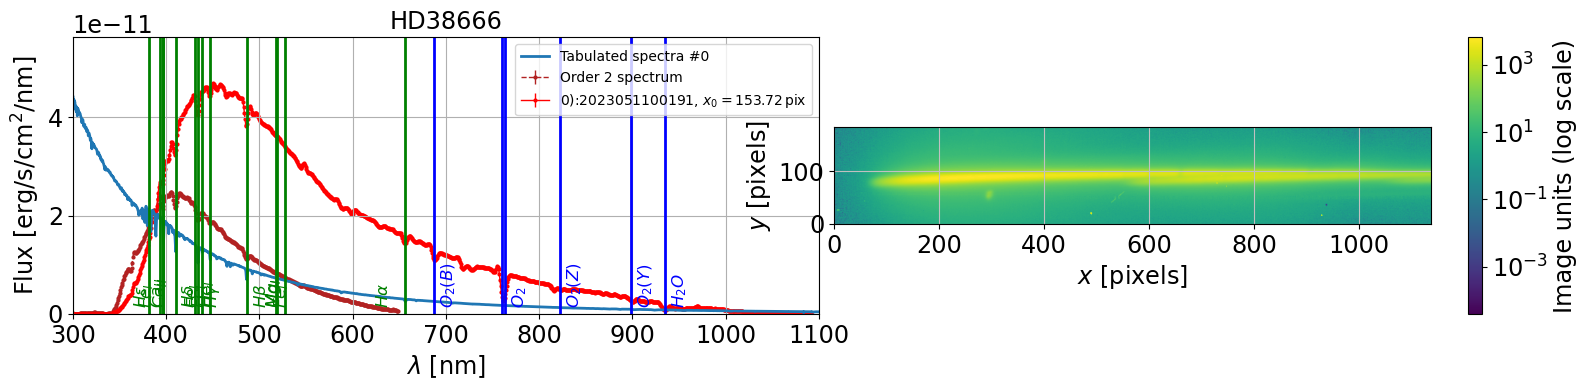

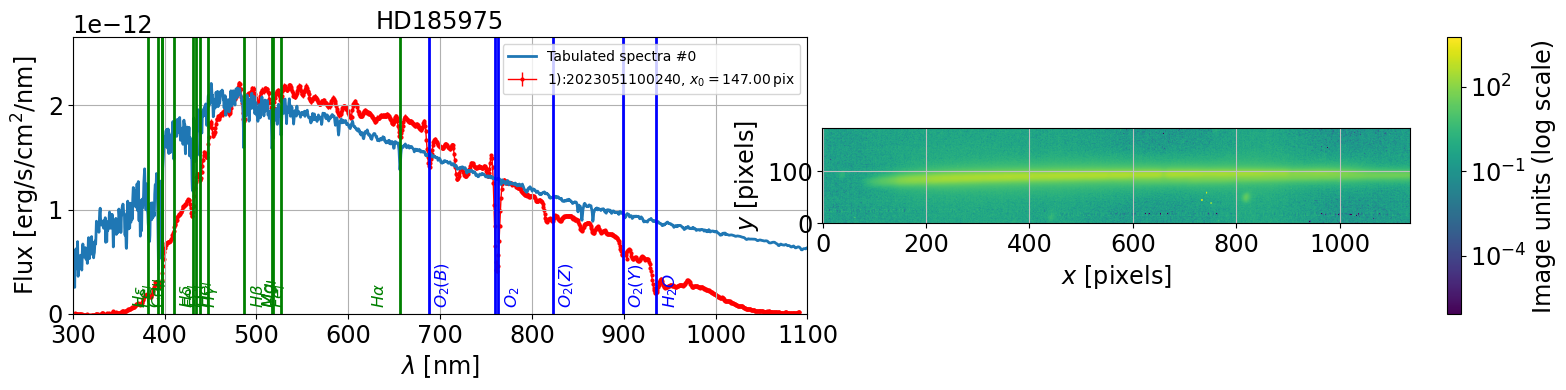

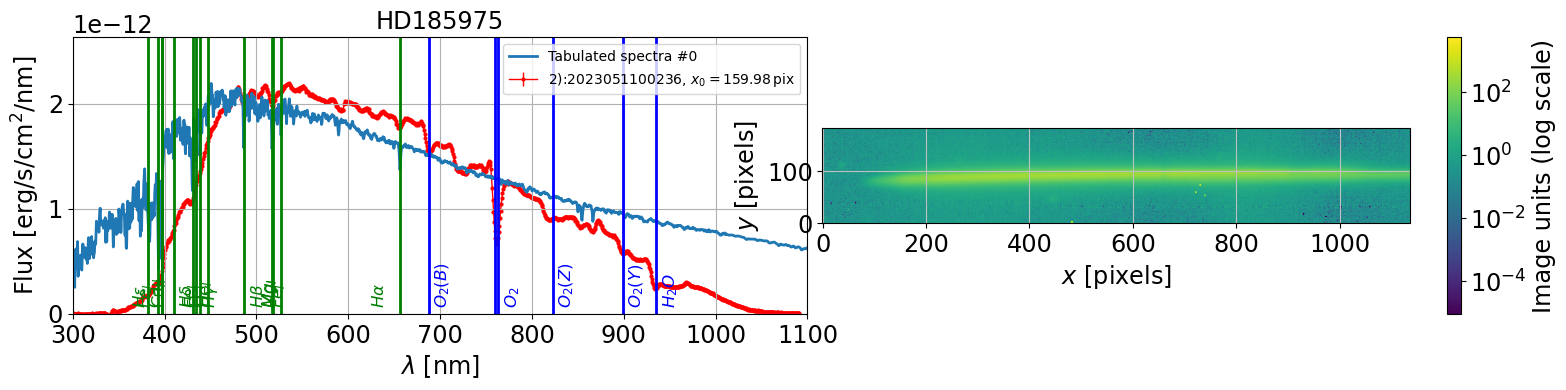

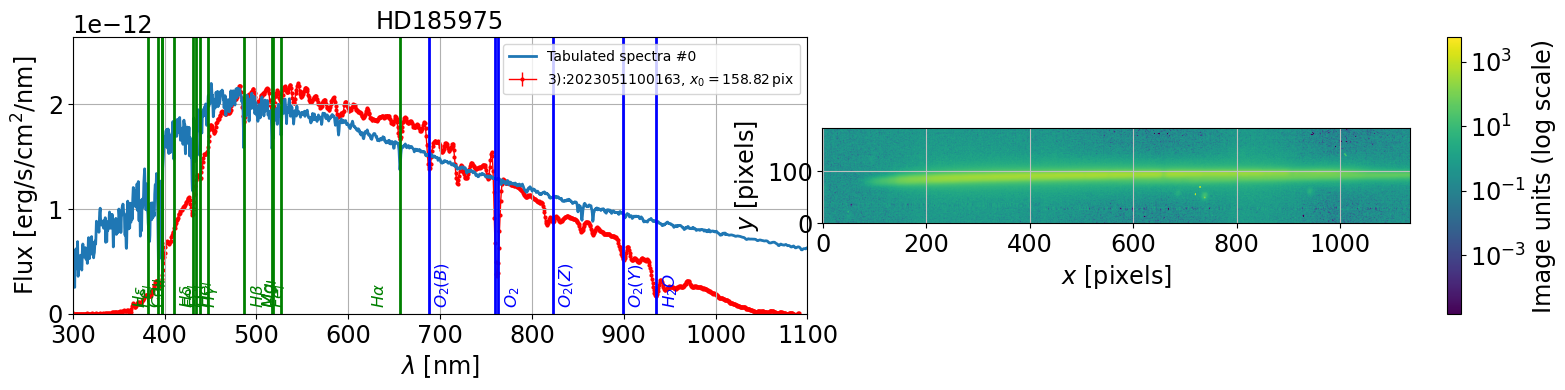

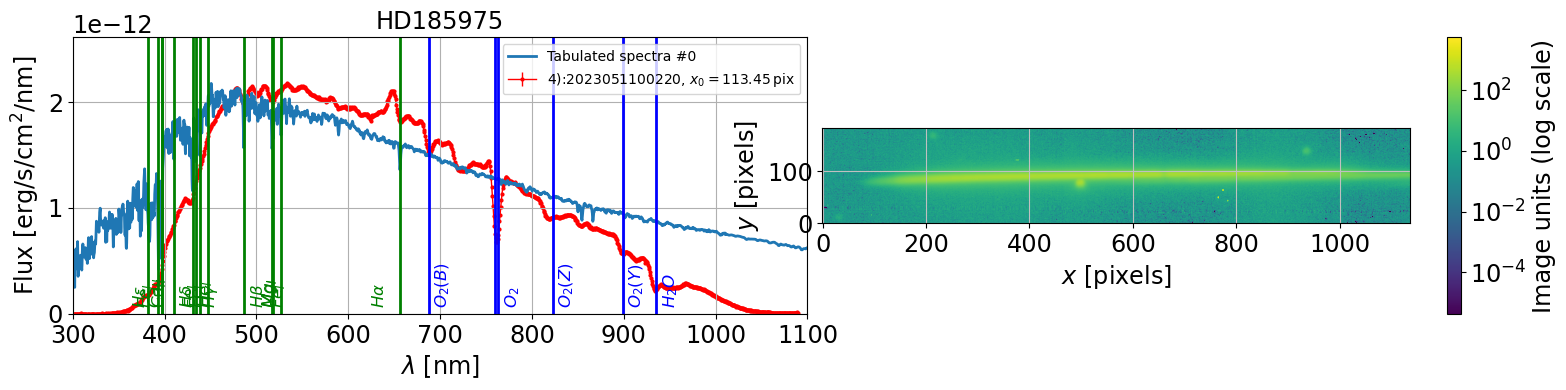

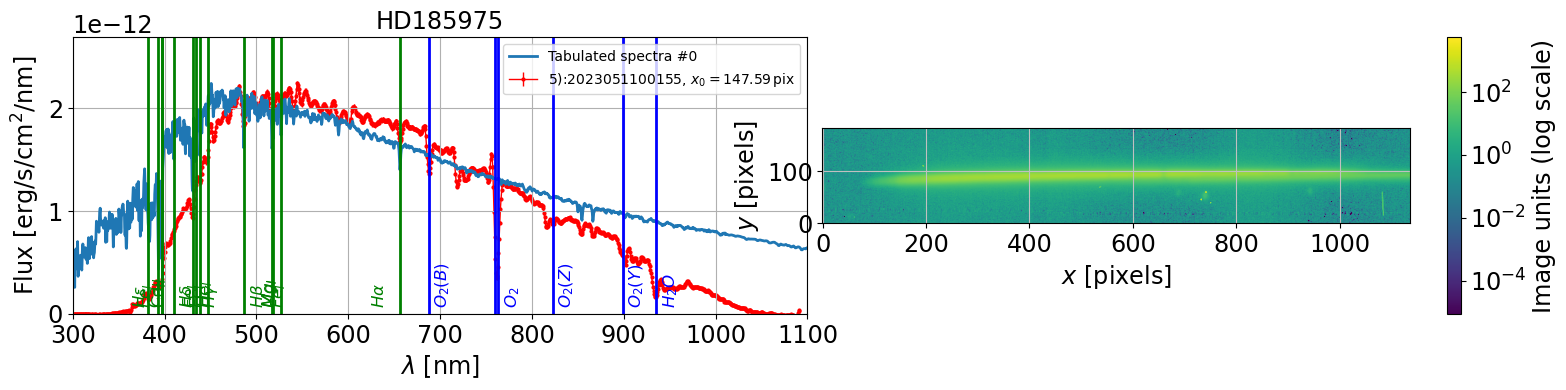

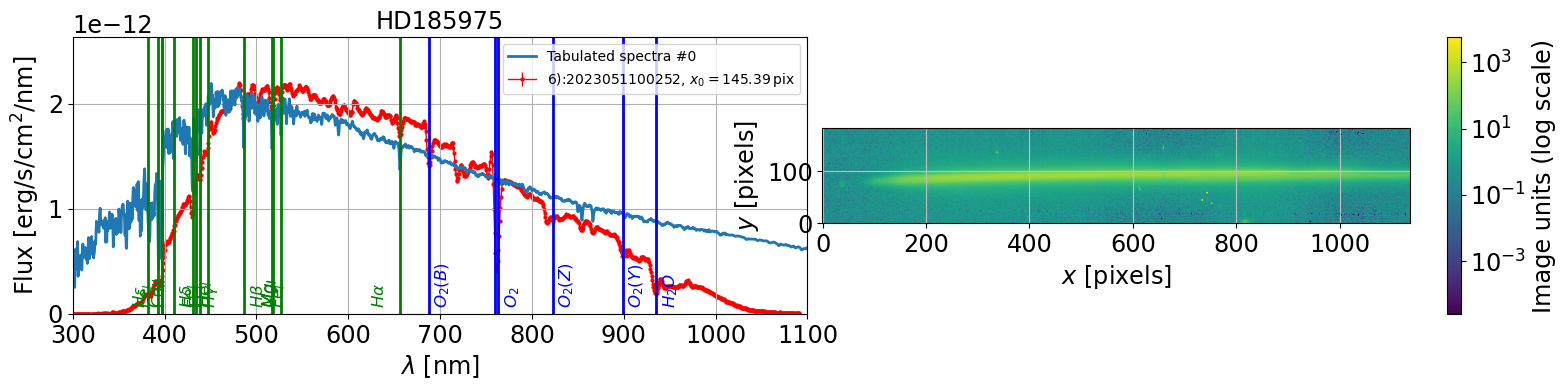

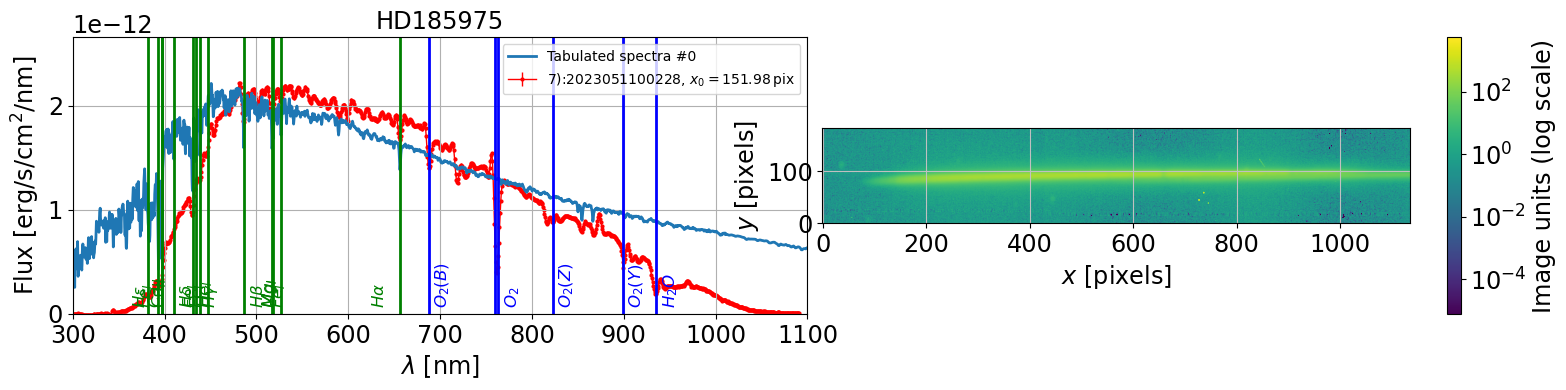

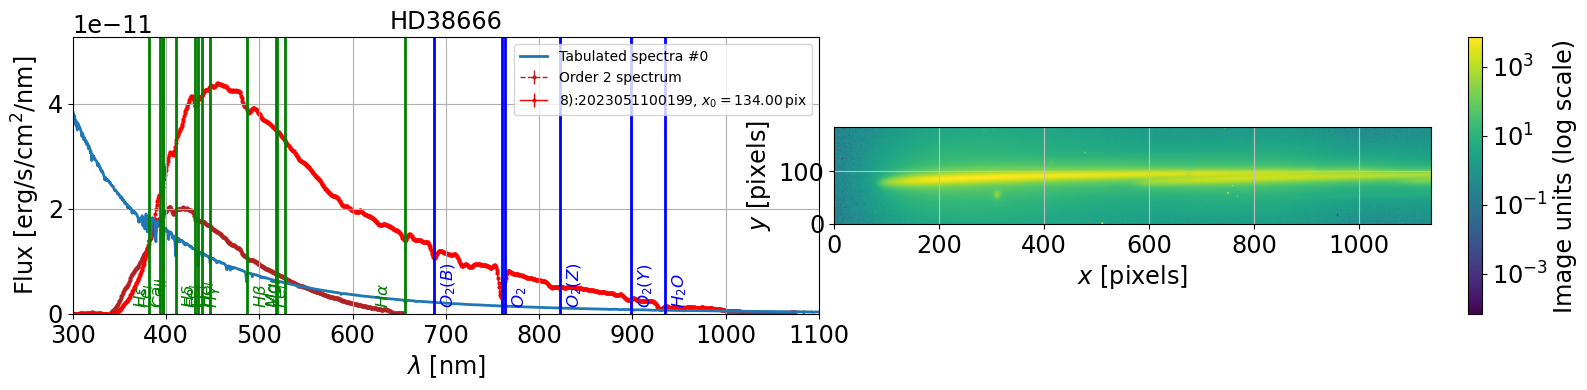

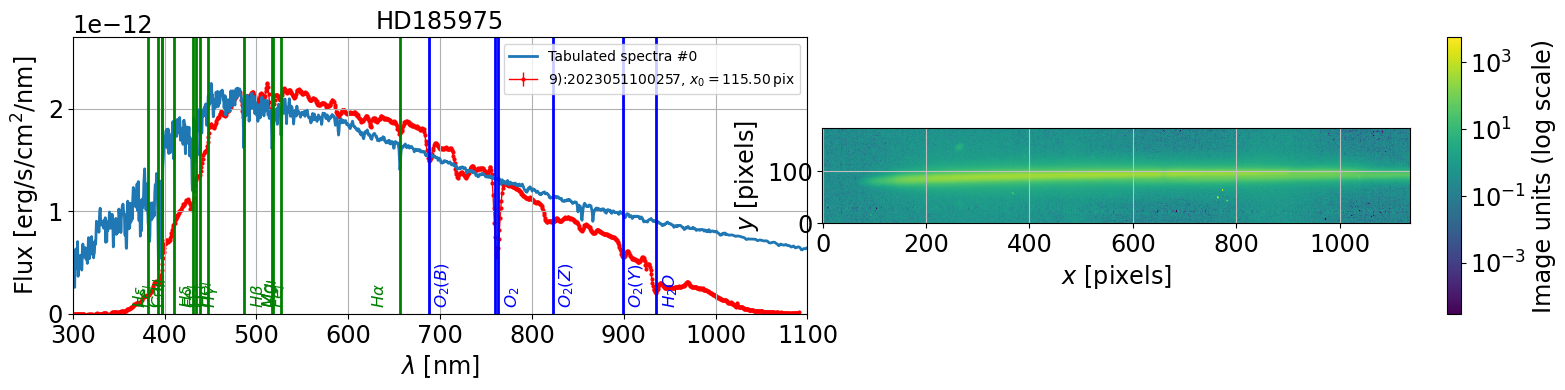

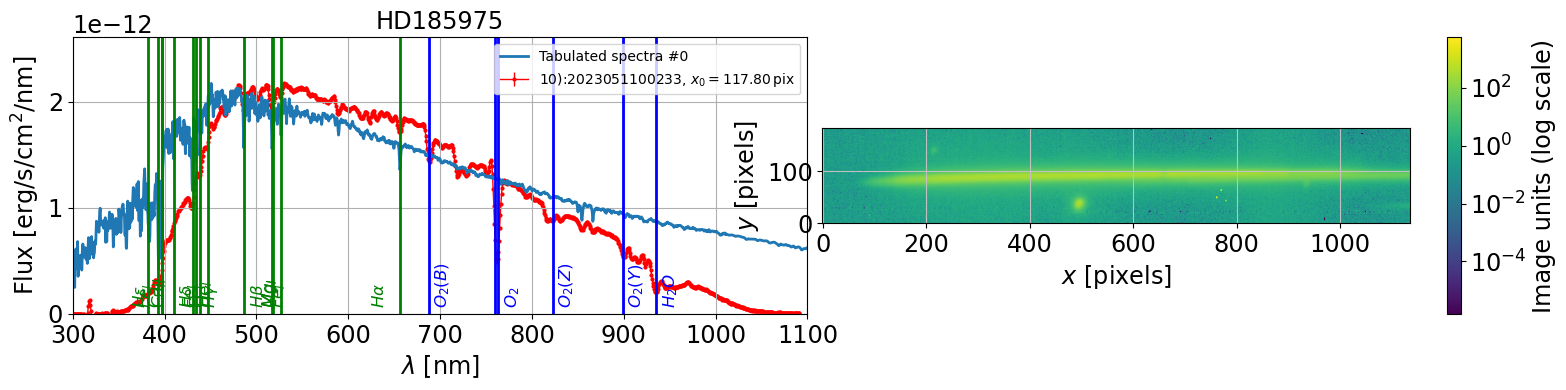

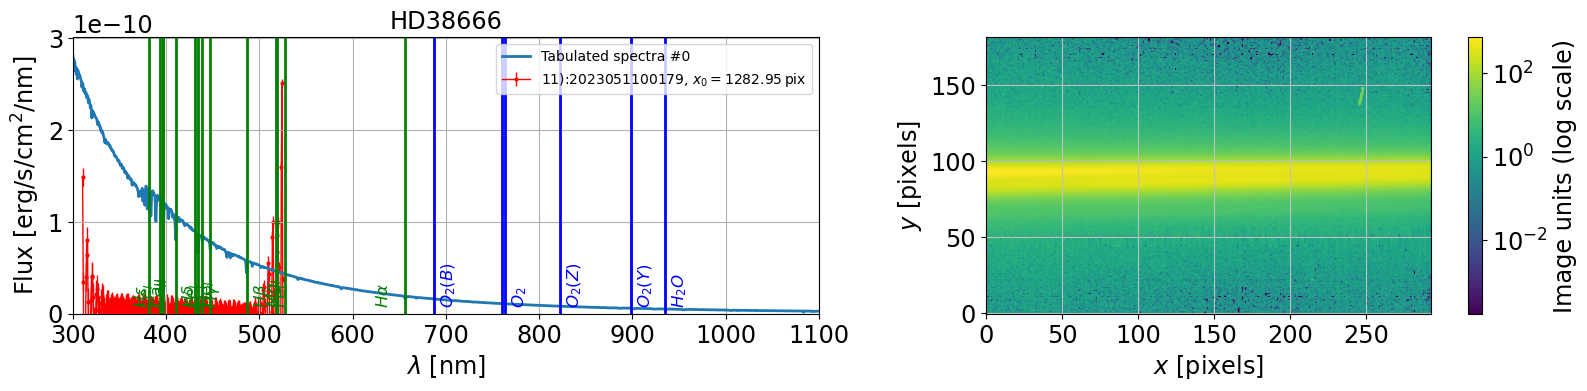

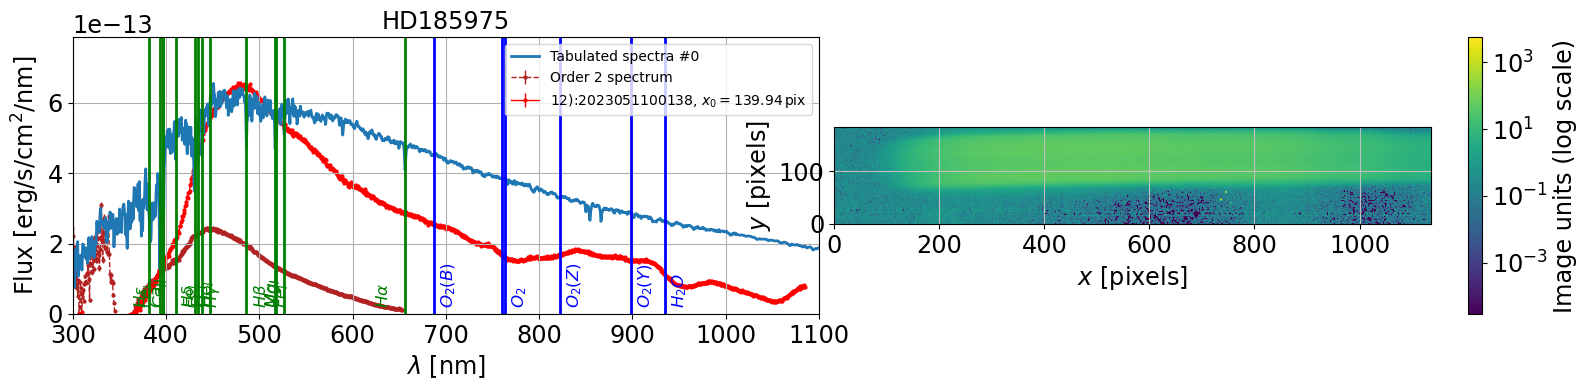

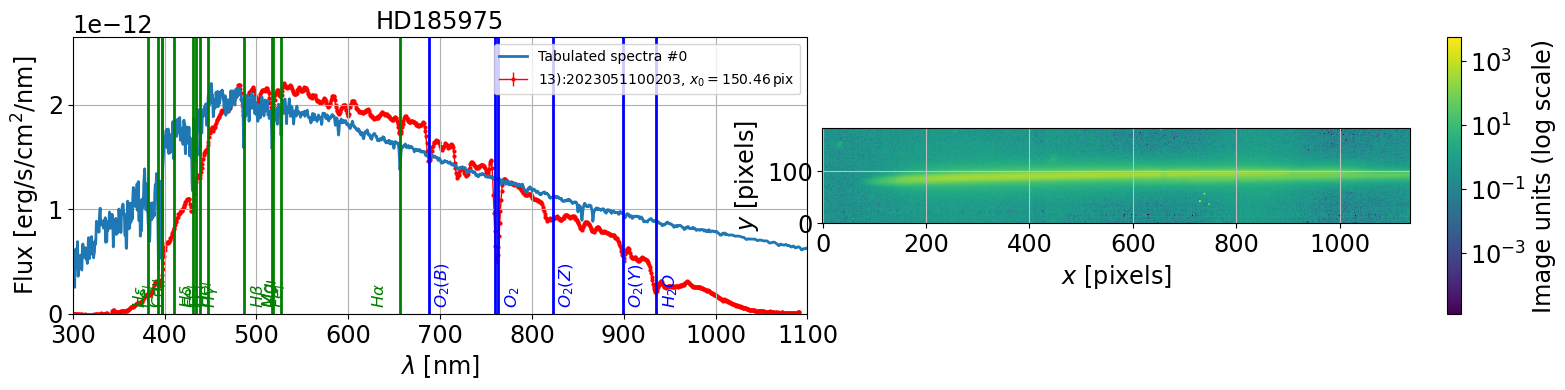

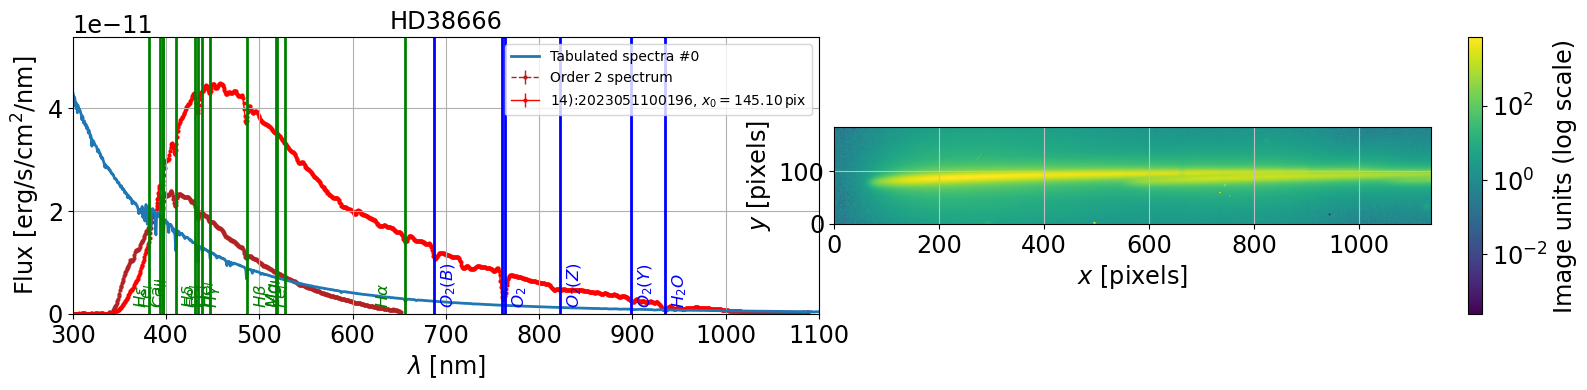

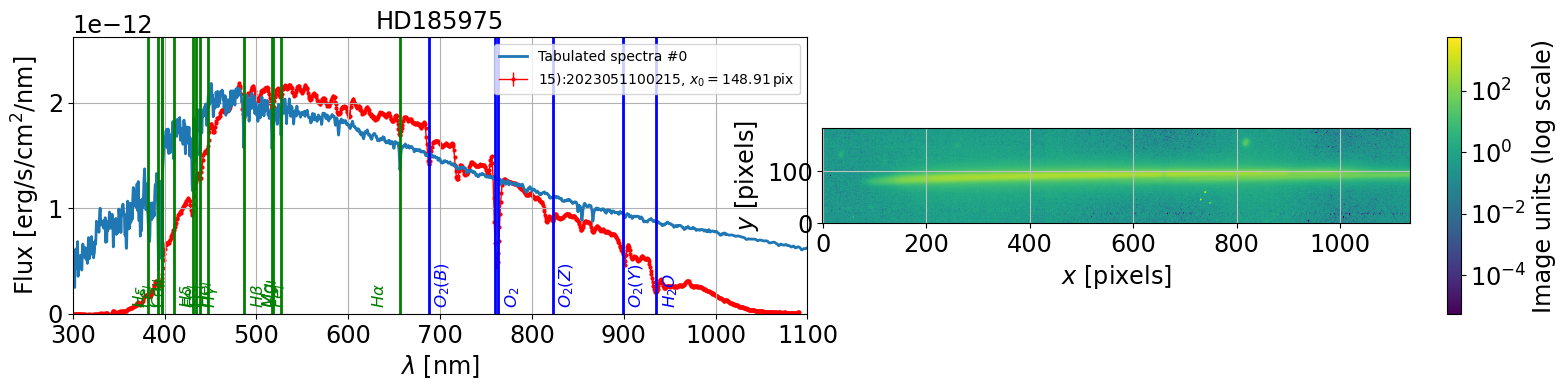

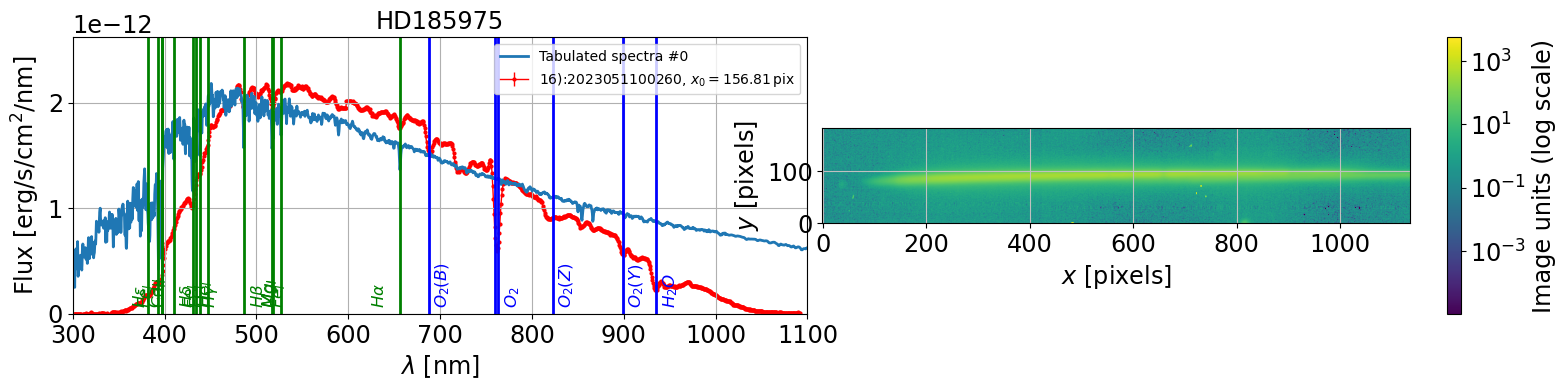

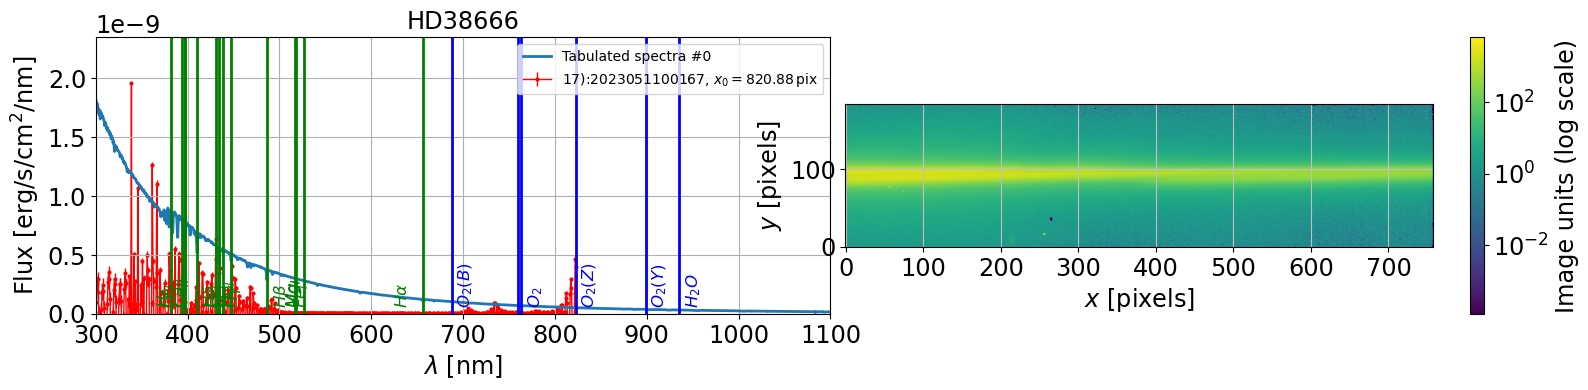

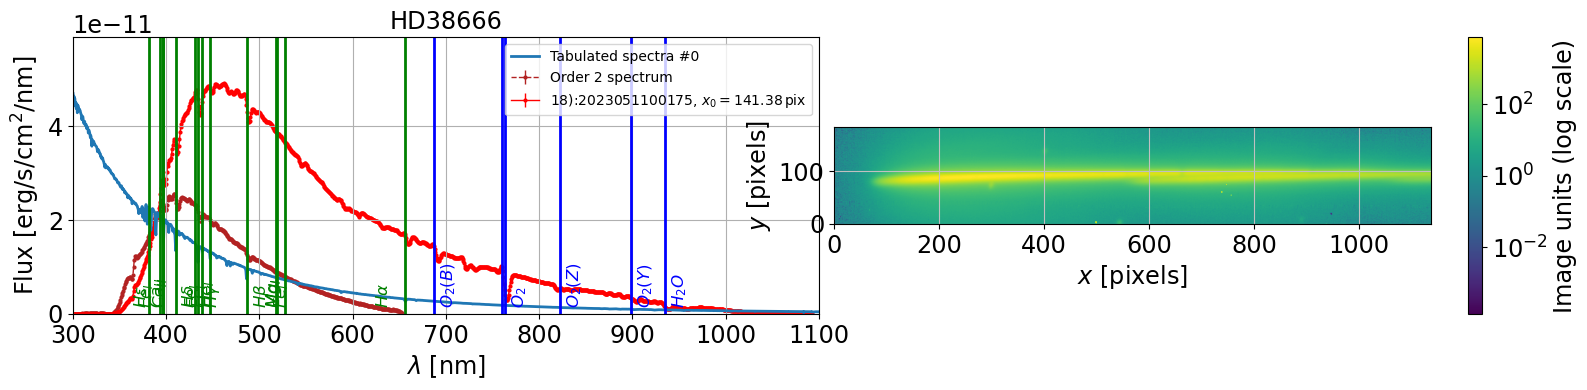

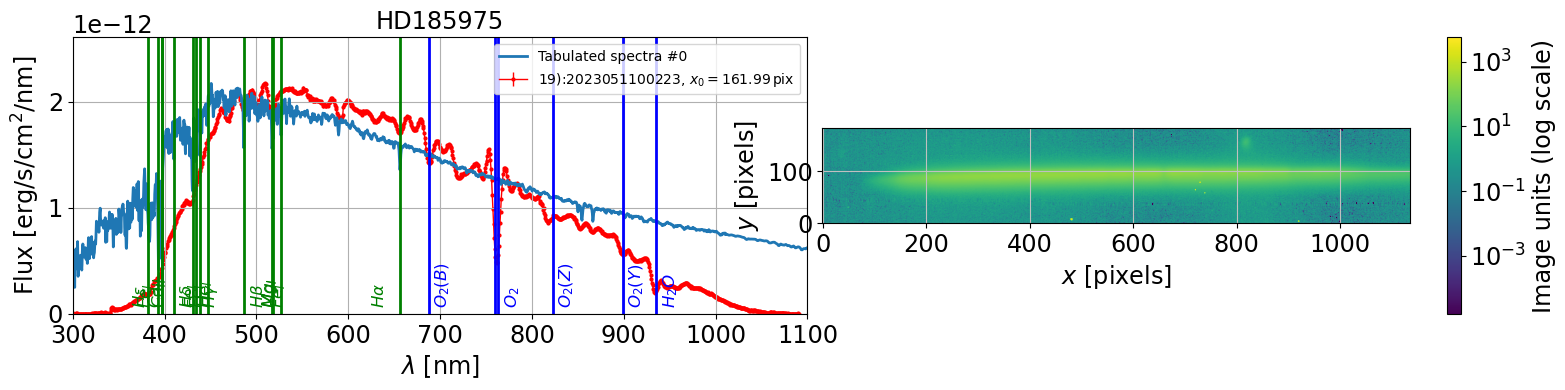

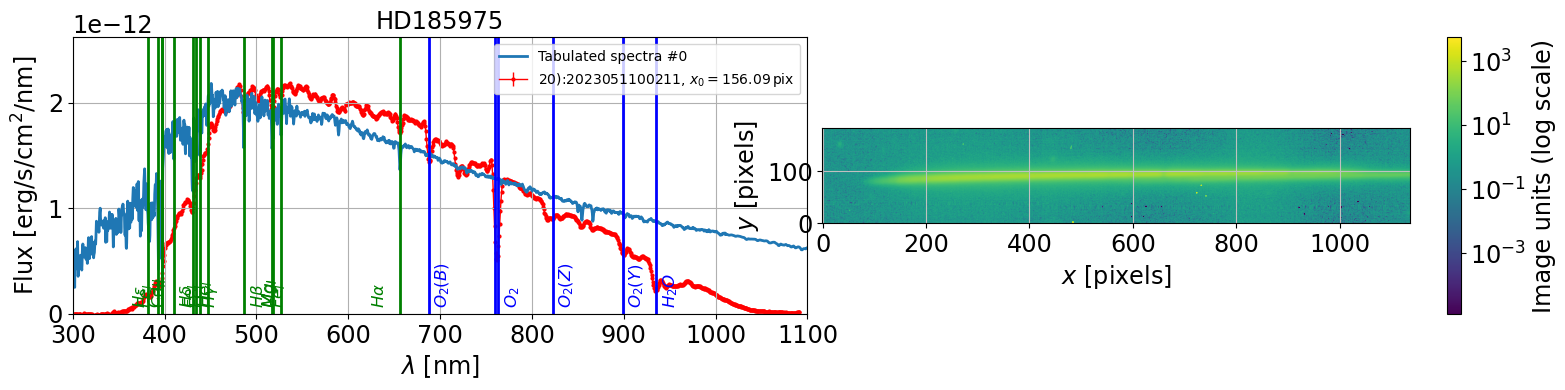

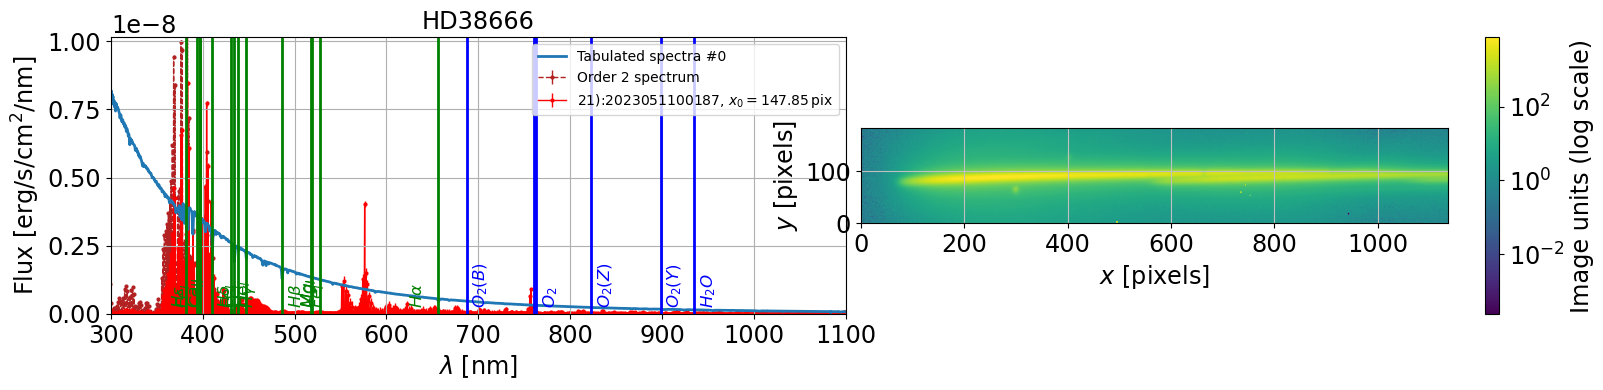

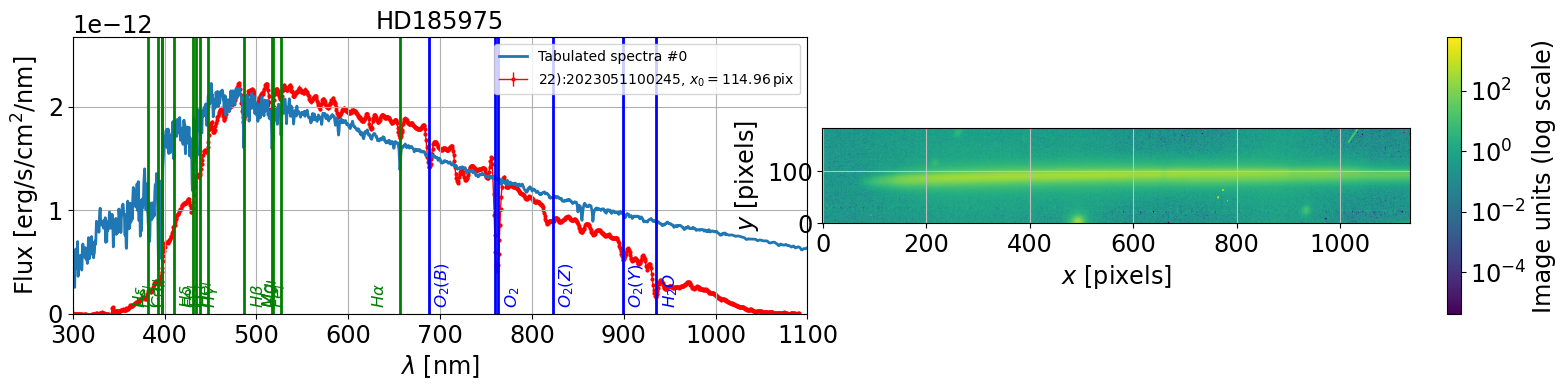

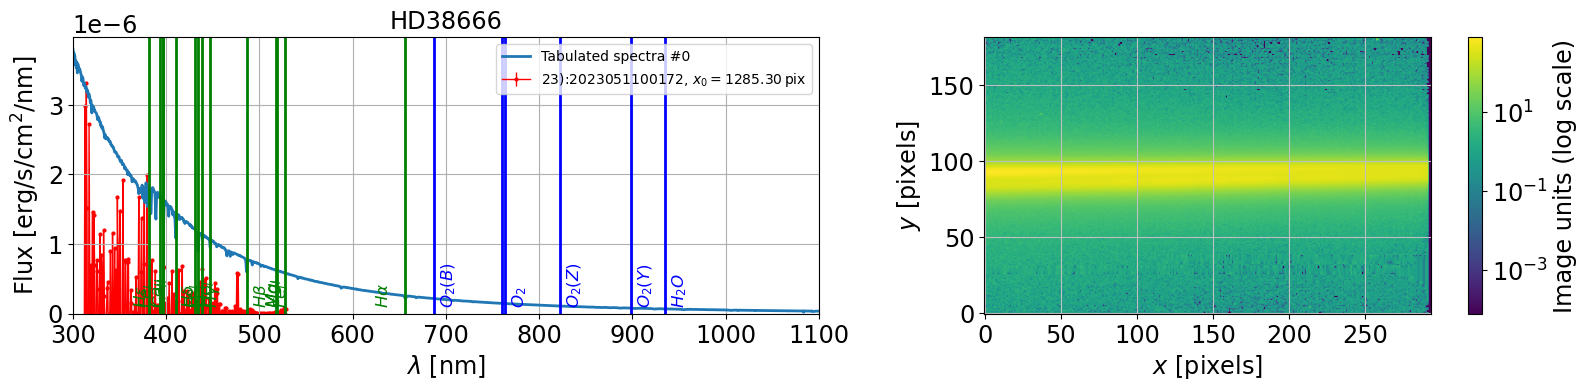

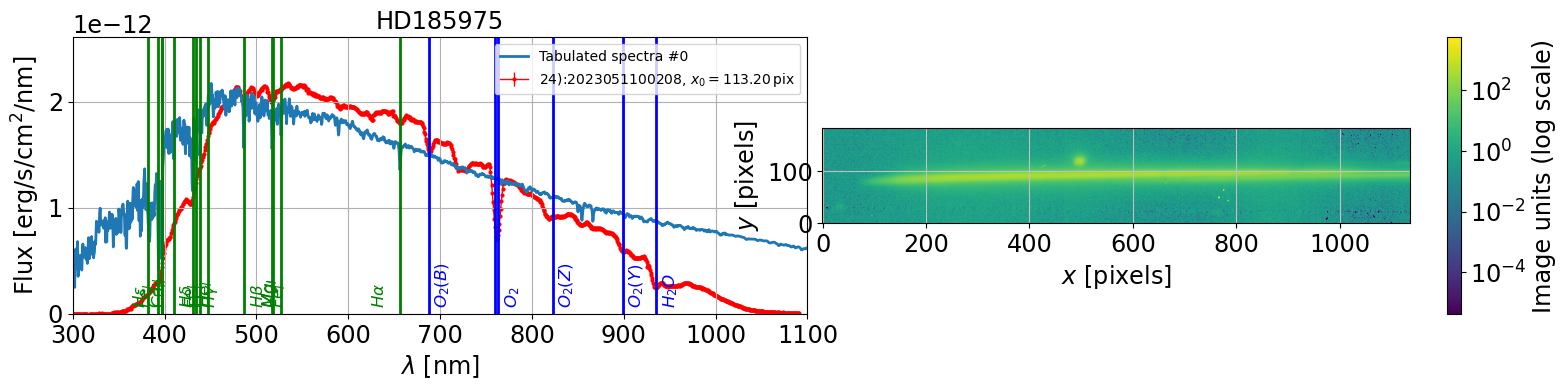

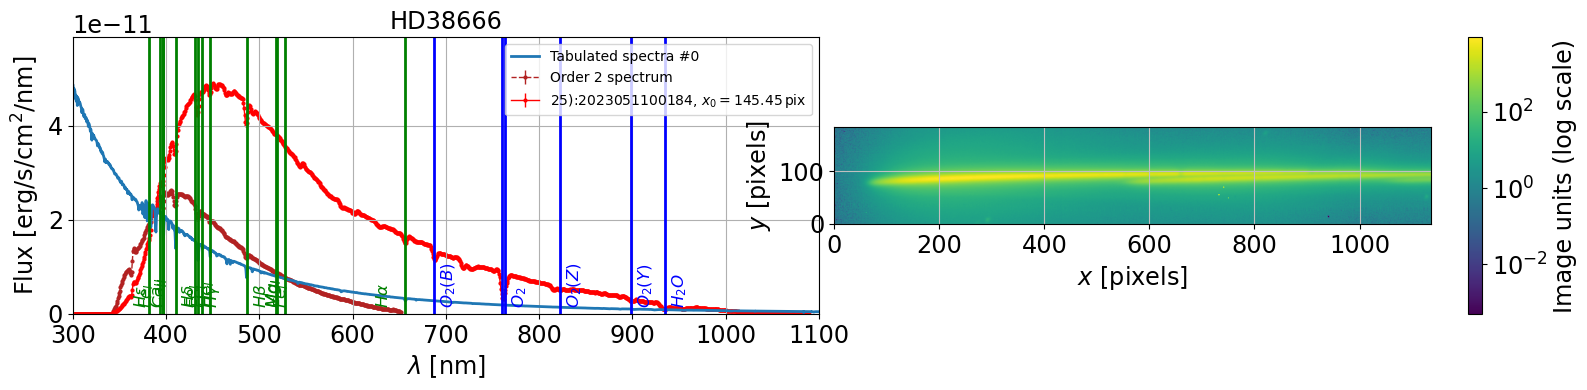

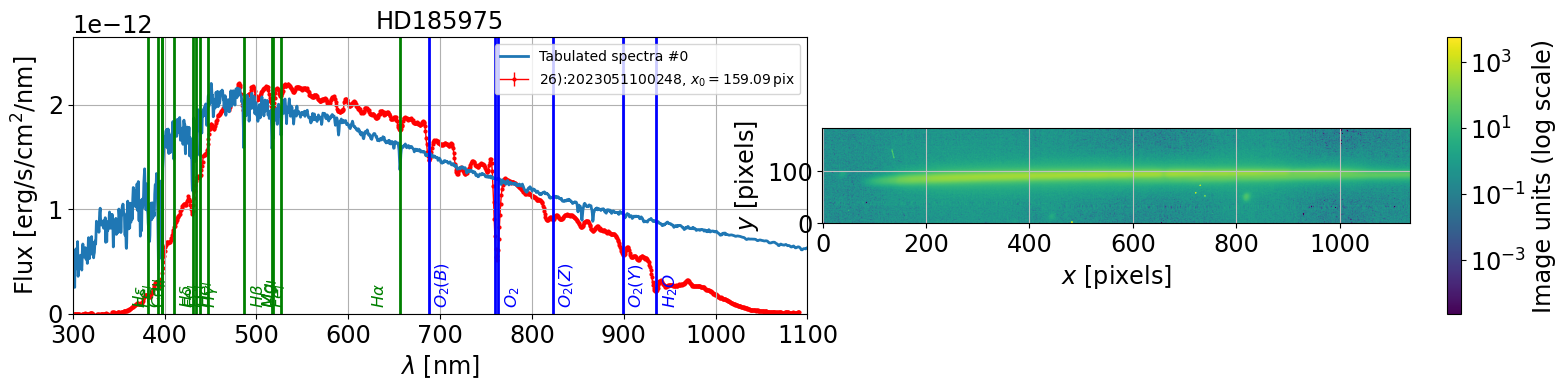

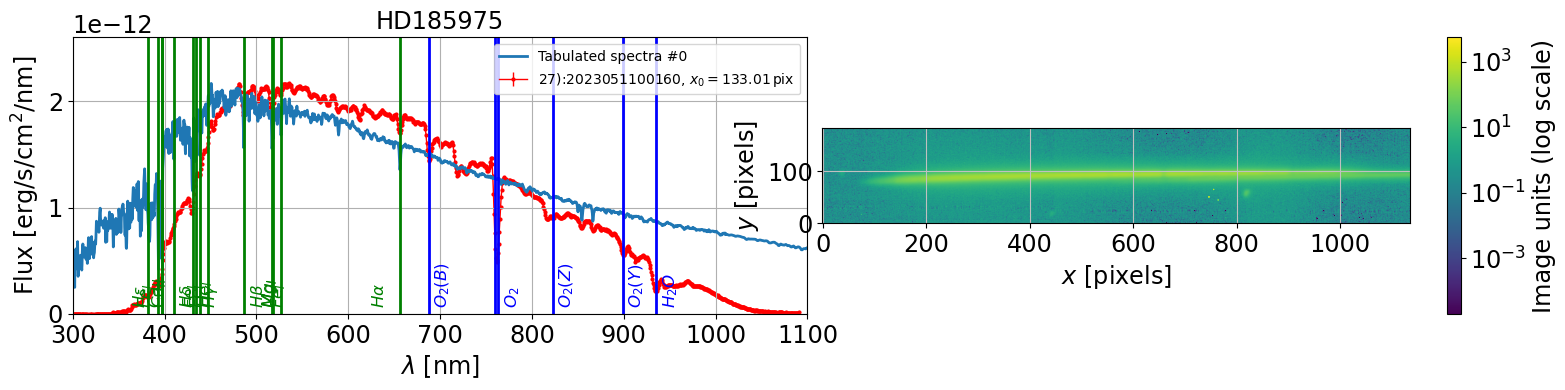

In [42]:
%matplotlib inline


infos = []
all_lambdas=[]
all_data=[]
all_data_err=[]


idx=0
for spec in all_spec:
    
    
    #s=spec.spectrum
    s=spec
    label = str(idx) +"):" + str(all_exposures[idx])
    
    try:
        fig=plt.figure(figsize=(16,4))
    
        ax1 = fig.add_subplot(1, 2, 1)
        s.plot_spectrum(ax=ax1,force_lines=True,label=label)
    
        ax2 = fig.add_subplot(1, 2, 2)
        s.plot_spectrogram(ax=ax2,scale="log")
    
        all_lambdas.append(s.lambdas)
        all_data.append(s.data)
        all_data_err.append(s.err)
    
        #save info    
        infos.append([idx,s.target.label,s.date_obs,s.airmass,s.temperature,s.pressure,s.humidity])
            
    except Exception as inst:
        print(" >>> Exception catched for "+ label )
        print(type(inst))    # the exception instance
        print(inst.args)     # arguments stored in .args

    
    idx+=1

# Generate info

In [43]:
df_infos=pd.DataFrame(infos,columns=["idx","object","date_obs","airmass","temperature","pressure","humidity"])

In [44]:
df_infos.set_index('idx',inplace=True)

In [45]:
all_reftime=[ (Time(tt)-Time( df_infos["date_obs"].values[0])).to_value(u.hr) for tt in df_infos["date_obs"].values ]

In [46]:
all_reftime=np.array(all_reftime)

In [47]:
df_infos["reftime"]=all_reftime

In [48]:
NN = len(df_infos)

In [49]:
df_infos

object                        date_obs   airmass  temperature  \
idx                                                                    
0     HD38666  2023-05-12T00:12:29.645996707Z  2.175456            0   
1    HD185975  2023-05-12T00:49:45.872502614Z  2.100031            0   
2    HD185975  2023-05-12T00:46:44.261508838Z  2.101509            0   
3    HD185975  2023-05-11T23:53:55.034507293Z  2.124050            0   
4    HD185975  2023-05-12T00:34:30.345005479Z  2.108103            0   
5    HD185975  2023-05-11T23:48:05.694491537Z  2.126096            0   
6    HD185975  2023-05-12T00:59:15.394492061Z  2.095194            0   
7    HD185975  2023-05-12T00:40:22.965507207Z  2.104620            0   
8     HD38666  2023-05-12T00:17:33.458500775Z  2.251656            0   
9    HD185975  2023-05-12T01:03:30.314509927Z  2.093680            0   
10   HD185975  2023-05-12T00:44:31.382492410Z  2.103332            0   
11    HD38666  2023-05-12T00:04:57.397493706Z  2.071742            0   
12   HD185975  2023-05-11T23:23:53.658005233Z  2.133431            0   
13   HD185975  2023-05-12T00:20:48.671994986Z  2.113478            0   
14    HD38666  2023-05-12T00:15:40.946505160Z  2.223546            0   
15   HD185975  2023-05-12T00:30:20.002006062Z  2.109297            0   
16   HD185975  2023-05-12T01:05:44.961991483Z  2.091748            0   
17    HD38666  2023-05-11T23:57:25.054490226Z  1.978279            0   
18    HD38666  2023-05-12T00:02:27.564505246Z  2.039633            0   
19   HD185975  2023-05-12T00:36:44.758001017Z  2.106306            0   
20   HD185975  2023-05-12T00:27:16.900995204Z  2.110627            0   
21    HD38666  2023-05-12T00:10:04.101991507Z  2.140783            0   
22   HD185975  2023-05-12T00:53:58.869992498Z  2.098629            0   
23    HD38666  2023-05-12T00:00:34.568998298Z  2.016855            0   
24   HD185975  2023-05-12T00:25:00.275996890Z  2.112388            0   
25    HD38666  2023-05-12T00:08:10.385498864Z  2.115338            0   
26   HD185975  2023-05-12T00:56:15.004507535Z  2.096723            0   
27   HD185975  2023-05-11T23:52:01.599991556Z  2.125477            0   

     pressure  humidity   reftime  
idx                                
0           0         0  0.000000  
1           0         0  0.621174  
2           0         0  0.570727  
3           0         0 -0.309614  
4           0         0  0.366861  
5           0         0 -0.406653  
6           0         0  0.779375  
7           0         0  0.464811  
8           0         0  0.084392  
9           0         0  0.850186  
10          0         0  0.533816  
11          0         0 -0.125625  
12          0         0 -0.809997  
13          0         0  0.138618  
14          0         0  0.053139  
15          0         0  0.297321  
16          0         0  0.887588  
17          0         0 -0.251275  
18          0         0 -0.167245  
19          0         0  0.404198  
20          0         0  0.246460  
21          0         0 -0.040429  
22          0         0  0.691451  
23          0         0 -0.198632  
24          0         0  0.208508  
25          0         0 -0.072017  
26          0         0  0.729266  
27          0         0 -0.341124

### Save info file

In [50]:
df_infos.to_csv(summary_file)